# Kernels SVC

In [ ]:
# Imports
import pandas as pd
import seaborn as sns

# Data
from sklearn.datasets import make_moons, make_classification

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Dataset
X, y = make_moons(n_samples=100, noise=0.15)

#### Poly Kernel
The `degree` hyperparameter will control how much "curve" there is in the separation line. The `C` is regularization and `coef0` controls how much the model is influenced by high and low degree polynomials.
* Model overfitting, reduze polynomial degree.
* Underfitting, increase poly degree

In [ ]:
steps = [('scaler', StandardScaler()),
         ('svm_classif', SVC(kernel='poly', degree=3, coef0=1, C=5))]

poly_kernel = Pipeline(steps)
poly_kernel.fit(X,y)

# Preds
preds = poly_kernel.predict(X)

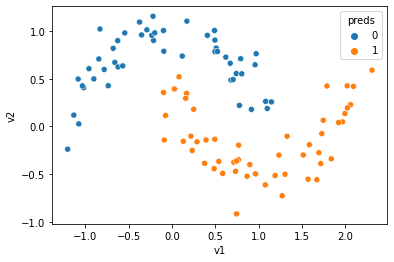

In [ ]:
# performance
result = pd.DataFrame(X, columns=['v1', 'v2'])
result['y_true'] = y
result['preds'] = preds
sns.scatterplot(data=result, x='v1', y='v2', hue='preds');

### RBF Kernel

Gaussian **R**adial **B**asis **F**unction
The higher the gamma, the more the Gaussian curves are narrow, so the decision boundary is more irregular. Smaller gamma, the decision line is more smooth.
* Model overfitting, reduce gamma.
* Model underfitting, increase gamma.

In [ ]:
steps = [('scaler', StandardScaler()),
         ('svm_classif', SVC(kernel='rbf', gamma=4, C=1))]

rbf_kernel = Pipeline(steps)
rbf_kernel.fit(X,y)

# Preds
preds = rbf_kernel.predict(X)

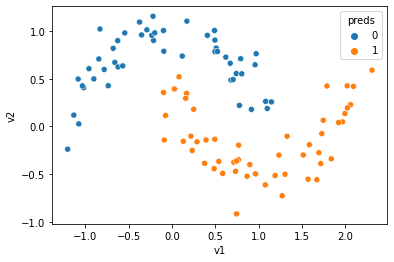

In [ ]:
# performance
result = pd.DataFrame(X, columns=['v1', 'v2'])
result['y_true'] = y
result['preds'] = preds
sns.scatterplot(data=result, x='v1', y='v2', hue='preds');

### Dataset 2

In [ ]:
# Dataset
X, y = make_classification(n_classes=2, n_features=6,
                           n_samples=500, n_informative=2,
                           scale=100, random_state=12)

# Dataframe
df = pd.DataFrame(X, columns=['var'+str(i) for i in range(1, X.shape[1]+1)])
df['label'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
df.head(3)

,var1,var2,var3,var4,var5,var6,label
0,140.954780,-85.669385,-201.454464,23.692218,-283.203988,-219.027776,0
1,-90.618006,-21.475871,98.699475,-121.603256,68.844603,-86.862013,1
2,116.255358,-27.188444,6.330764,-52.546410,-24.022472,-37.955907,0


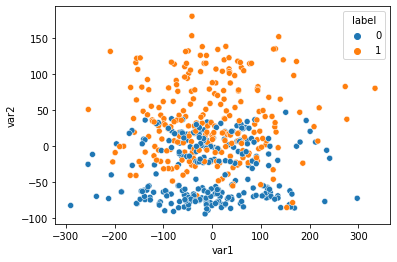

In [ ]:
sns.scatterplot(data=df, x='var1', y='var2', hue='label');

In [ ]:
steps = [('scaler', StandardScaler()),
         ('svm_classif', SVC(kernel='rbf', gamma=0.5, C=10))]

rbf_kernel = Pipeline(steps)
rbf_kernel.fit(X_train,y_train)

# Preds
preds = rbf_kernel.predict(X_test)

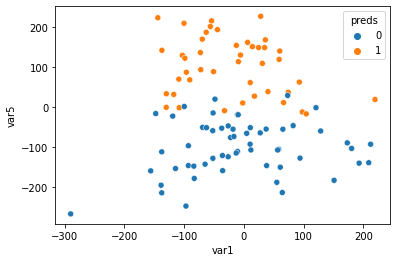

In [ ]:
# performance
result = pd.DataFrame(X_test, columns=['var'+str(i) for i in range(1, X.shape[1]+1)])
result['preds'] = preds
sns.scatterplot(data=result, x='var1', y='var5', hue='preds');

In [ ]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, result.preds, labels=[0,1]))

,0,1
0,51,2
1,6,41


In [ ]:
rbf_kernel.score(X_test, y_test)

0.94

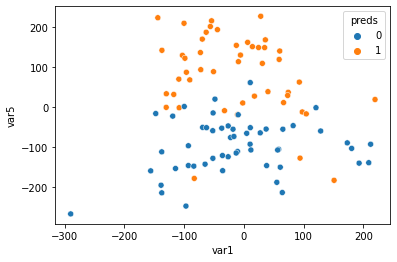

In [ ]:
from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', StandardScaler()),
         ('svm_classif', RandomForestClassifier())]

rf = Pipeline(steps)
rf.fit(X_train,y_train)

# Preds
preds = rf.predict(X_test)

# performance
result = pd.DataFrame(X_test, columns=['var'+str(i) for i in range(1, X.shape[1]+1)])
result['preds'] = preds
sns.scatterplot(data=result, x='var1', y='var5', hue='preds');

In [ ]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, result.preds, labels=[0,1]))

,0,1
0,49,4
1,4,43


In [ ]:
rf.score(X_test, y_test)

0.92